# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

Por ejemplo:

1. Puede importar el CSV generado por Python a su computadora portátil y explorarlo.
2. Puede conectarse a su base de datos usando `pandas.read_sql` desde este cuaderno y explorarla.

In [1]:
# Ejemplo de lectura de la base de datos SQL desde aquí
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd

# cargar las variables del archivo .env
load_dotenv()

connection_string = f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}"
engine = create_engine(connection_string).execution_options(autocommit=True)
engine.connect()

# dataframe = pd.read_sql("Select * from books;", engine)
# print(dataframe.describe())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from sqlalchemy import create_engine

# Cargar las variables del archivo .env
load_dotenv()

# Función para conectarse a la base de datos
def connect():
    connection_string = f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"
    engine = create_engine(connection_string)
    return engine

# Conectar a la base de datos
engine = connect()

# Obtener una conexión cruda desde el motor
connection = engine.raw_connection()

try:
    # Leer datos de la tabla 'books'
    dataframe_books = pd.read_sql("SELECT * FROM books;", con=connection)
    print("Datos de la tabla 'books':")
    print(dataframe_books.head())

    # Leer datos de la tabla 'publishers'
    dataframe_publishers = pd.read_sql("SELECT * FROM publishers;", con=connection)
    print("Datos de la tabla 'publishers':")
    print(dataframe_publishers.head())

    # Leer datos de la tabla 'authors'
    dataframe_authors = pd.read_sql("SELECT * FROM authors;", con=connection)
    print("Datos de la tabla 'authors':")
    print(dataframe_authors.head())

    # Leer datos de la tabla 'book_authors'
    dataframe_book_authors = pd.read_sql("SELECT * FROM book_authors;", con=connection)
    print("Datos de la tabla 'book_authors':")
    print(dataframe_book_authors.head())
finally:
    # Asegurarse de cerrar la conexión
    connection.close()


Datos de la tabla 'books':
   book_id                                              title  total_pages  \
0        1        Lean Software Development: An Agile Toolkit          240   
1        2                  Facing the Intelligence Explosion           91   
2        3                                    Scala in Action          419   
3        4  Patterns of Software: Tales from the Software ...          256   
4        5                                    Anatomy Of LISP          446   

   rating           isbn published_date  publisher_id  
0    4.17  9780320000000     2003-05-18             5  
1    3.87           None     2013-02-01             7  
2    3.74  9781940000000     2013-04-10             1  
3    3.84  9780200000000     1996-08-15             1  
4    4.43  9780070000000     1978-01-01             3  
Datos de la tabla 'publishers':
   publisher_id            name
0             1  O Reilly Media
1             2    A Book Apart
2             3      A K PETERS
3       

/tmp/ipykernel_513/2155915250.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe_books = pd.read_sql("SELECT * FROM books;", con=connection)
/tmp/ipykernel_513/2155915250.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe_publishers = pd.read_sql("SELECT * FROM publishers;", con=connection)
/tmp/ipykernel_513/2155915250.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe_authors = pd.read_sql("SELECT * FROM authors;", con=connection)
/tmp/ipykernel_513/2155915250.py:40: UserWarning: pandas

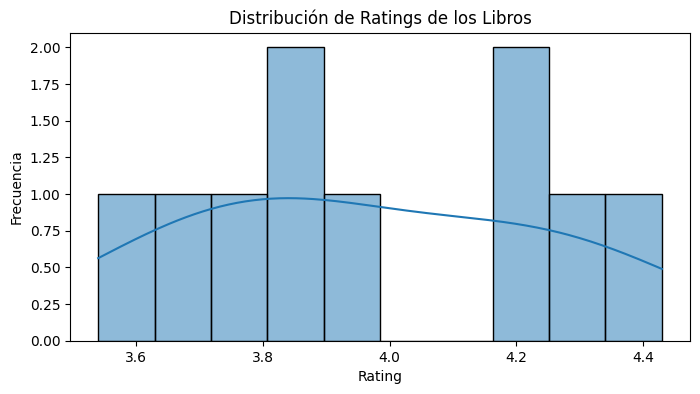

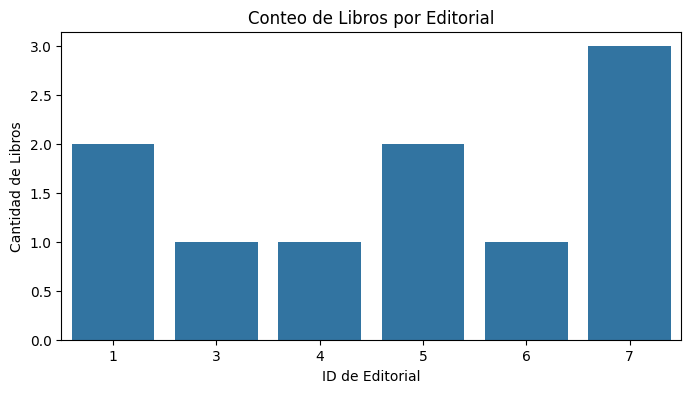

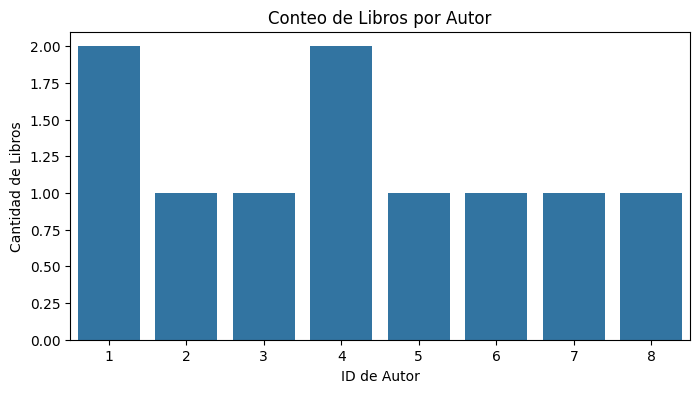

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización: Distribución de ratings de los libros
plt.figure(figsize=(8, 4))
sns.histplot(data=dataframe_books, x='rating', bins=10, kde=True)
plt.title('Distribución de Ratings de los Libros')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

# Visualización: Conteo de libros por editorial
plt.figure(figsize=(8, 4))
sns.countplot(data=dataframe_books, x='publisher_id')
plt.title('Conteo de Libros por Editorial')
plt.xlabel('ID de Editorial')
plt.ylabel('Cantidad de Libros')
plt.show()

# Visualización: Conteo de libros por autor
plt.figure(figsize=(8, 4))
sns.countplot(data=dataframe_book_authors, x='author_id')
plt.title('Conteo de Libros por Autor')
plt.xlabel('ID de Autor')
plt.ylabel('Cantidad de Libros')
plt.show()

Datos de la tabla 'books':
   book_id                                              title  total_pages  \
0        1        Lean Software Development: An Agile Toolkit          240   
1        2                  Facing the Intelligence Explosion           91   
2        3                                    Scala in Action          419   
3        4  Patterns of Software: Tales from the Software ...          256   
4        5                                    Anatomy Of LISP          446   

   rating           isbn published_date  publisher_id  
0    4.17  9780320000000     2003-05-18             5  
1    3.87           None     2013-02-01             7  
2    3.74  9781940000000     2013-04-10             1  
3    3.84  9780200000000     1996-08-15             1  
4    4.43  9780070000000     1978-01-01             3  
Datos de la tabla 'publishers':
   publisher_id            name
0             1  O Reilly Media
1             2    A Book Apart
2             3      A K PETERS
3       

/tmp/ipykernel_513/3187849249.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe = pd.read_sql(query, con=connection.connection)


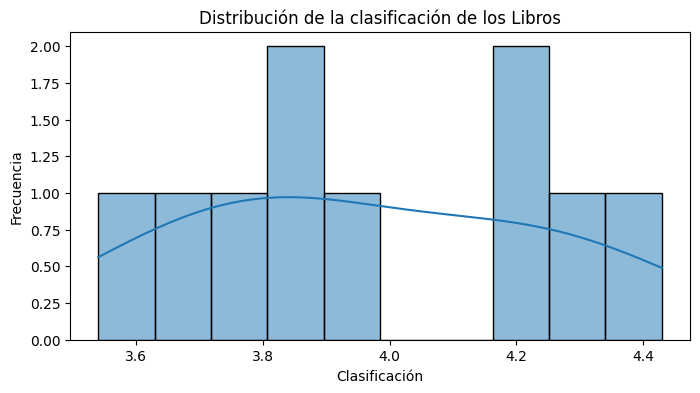

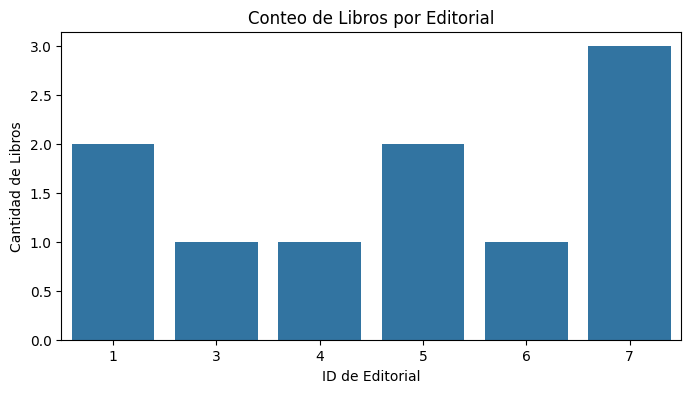

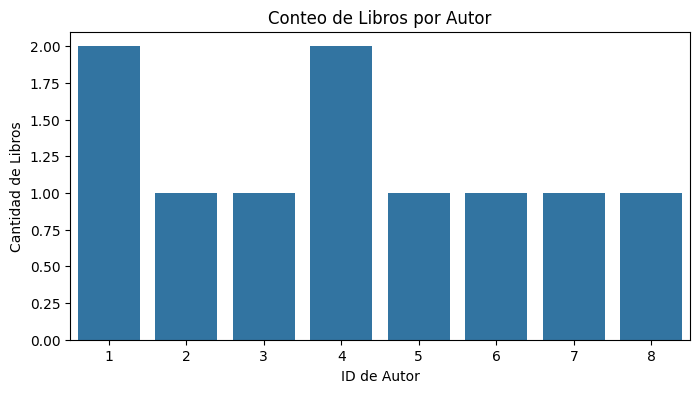

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from sqlalchemy import create_engine

# Cargar las variables del archivo .env
load_dotenv()

# Función para conectarse a la base de datos
def connect():
    connection_string = f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"
    engine = create_engine(connection_string)
    return engine

# Función para leer datos de una tabla y devolver un DataFrame
def read_table(engine, table_name):
    query = f"SELECT * FROM {table_name};"
    with engine.connect() as connection:
        dataframe = pd.read_sql(query, con=connection.connection)
    return dataframe

# Función principal
def main():
    # Conectar a la base de datos
    engine = connect()

    # Leer datos de las tablas
    dataframe_books = read_table(engine, "books")
    dataframe_publishers = read_table(engine, "publishers")
    dataframe_authors = read_table(engine, "authors")
    dataframe_book_authors = read_table(engine, "book_authors")

    # Mostrar datos
    print("Datos de la tabla 'books':")
    print(dataframe_books.head())
    print("Datos de la tabla 'publishers':")
    print(dataframe_publishers.head())
    print("Datos de la tabla 'authors':")
    print(dataframe_authors.head())
    print("Datos de la tabla 'book_authors':")
    print(dataframe_book_authors.head())

    # Visualización: Distribución de ratings de los libros
    plt.figure(figsize=(8, 4))
    sns.histplot(data=dataframe_books, x='rating', bins=10, kde=True)
    plt.title('Distribución de la clasificación de los Libros')
    plt.xlabel('Clasificación')
    plt.ylabel('Frecuencia')
    plt.show()

    # Visualización: Conteo de libros por editorial
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataframe_books, x='publisher_id')
    plt.title('Conteo de Libros por Editorial')
    plt.xlabel('ID de Editorial')
    plt.ylabel('Cantidad de Libros')
    plt.show()

    # Visualización: Conteo de libros por autor
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataframe_book_authors, x='author_id')
    plt.title('Conteo de Libros por Autor')
    plt.xlabel('ID de Autor')
    plt.ylabel('Cantidad de Libros')
    plt.show()

# Ejecutar la función principal
if __name__ == "__main__":
    main()